# Proyecto Modulo 1

dataset:
https://www.kaggle.com/airbnb/seattle


In [788]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import gmplot
import geopandas as gpd
import shapely
from shapely.geometry import *

import plotly

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

import plotly.express as px

import json

from scipy import stats
import scipy

import statsmodels.api as sm

from IPython.core.display import display, HTML
%matplotlib inline

In [50]:
calendario = pd.read_csv("calendar.csv")

In [51]:
listado = pd.read_csv("listings.csv")

## Analisis primer dataset

In [53]:
calendario.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [54]:
len(calendario["listing_id"].unique())

3818

In [55]:
len(calendario["date"].unique())

365

In [56]:
calendario["available"].unique()

array(['t', 'f'], dtype=object)

In [731]:
# Cambiamos t y f por 1 y 0 para hacer más comodos los datos:
calendario["available"] = calendario["available"].replace("f", 0)
calendario["available"] = calendario["available"].replace("t", 1)
calendario["price"] = calendario["price"].str.replace("$","")
calendario["price"] = calendario["price"].str.replace(",","")
calendario["price"] = pd.to_numeric(calendario["price"])
calendario['month'] = pd.DatetimeIndex(calendario["date"]).month

In [732]:
calendario.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,1,85.0,1
1,241032,2016-01-05,1,85.0,1
2,241032,2016-01-06,0,NaN,1
3,241032,2016-01-07,0,NaN,1
4,241032,2016-01-08,0,NaN,1


In [60]:
# Agrupamos los datos por la fecha y añadimos una columna con el día y otra para el mes
disponibilidad = calendario[["available", "date"]].groupby("date").sum()
disponibilidad["day"] = np.arange(0, 365)
disponibilidad

,available,day
date,,
2016-01-04,1735,0
2016-01-05,1867,1
2016-01-06,1826,2
2016-01-07,1776,3
2016-01-08,1782,4
...,...,...
2016-12-29,2835,360
2016-12-30,2840,361
2016-12-31,2859,362


In [61]:
disponibilidad_mes = calendario[["available", "month"]].groupby("month").sum()
disponibilidad_mes

,available
month,
1,64937
2,73321
3,83938
4,76037
5,79971
6,77244
7,74222
8,76347
9,77246


In [733]:
# De forma similar, miramos la media de precios a lo largo del año
precios = calendario.dropna()
precios_dia = precios[["price", "date"]].groupby("date").mean()
precios_dia["day"] = np.arange(0, 365)
precios_dia

,price,day
date,,
2016-01-04,122.085879,0
2016-01-05,120.681307,1
2016-01-06,120.928258,2
2016-01-07,120.958896,3
2016-01-08,127.640853,4
2016-01-09,127.330819,5
2016-01-10,120.001991,6
2016-01-11,118.988942,7
2016-01-12,118.720908,8


In [63]:
precios_mes = precios[["price", "month"]].groupby("month").mean()
precios_mes

,price
month,
1,122.912176
2,124.293927
3,128.644488
4,135.097005
5,139.538183
6,147.473137
7,152.094150
8,150.656594
9,143.255949


Text(0.5, 33.00000000000005, 'Mes')

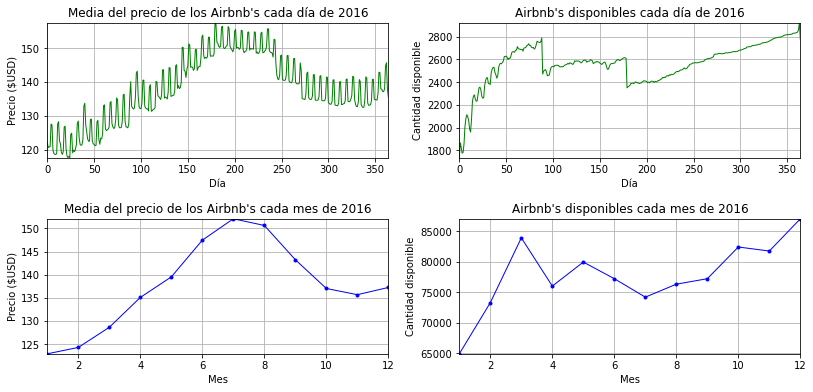

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
fig.tight_layout(pad=4.0)
axes[0][0].plot(precios_dia["day"], precios_dia["price"], 'g-',linewidth=1)
axes[0][0].grid()
axes[0][0].autoscale(axis='both', tight=True)
axes[0][0].set_title("Media del precio de los Airbnb's cada día de 2016")
axes[0][0].set_ylabel("Precio ($USD)")
axes[0][0].set_xlabel("Día")

axes[1][0].plot(precios_mes.index, precios_mes["price"], 'b.-',linewidth=1)
axes[1][0].grid()
axes[1][0].autoscale(axis='both', tight=True)
axes[1][0].set_title("Media del precio de los Airbnb's cada mes de 2016")
axes[1][0].set_ylabel("Precio ($USD)")
axes[1][0].set_xlabel("Mes")

axes[0][1].plot(disponibilidad["day"], disponibilidad["available"], 'g-',linewidth=1)
axes[0][1].grid()
axes[0][1].autoscale(axis='both', tight=True)
axes[0][1].set_title("Airbnb's disponibles cada día de 2016")
axes[0][1].set_ylabel("Cantidad disponible")
axes[0][1].set_xlabel("Día")

axes[1][1].plot(disponibilidad_mes.index, disponibilidad_mes["available"], 'b.-',linewidth=1)
axes[1][1].grid()
axes[1][1].autoscale(axis='both', tight=True)
axes[1][1].set_title("Airbnb's disponibles cada mes de 2016")
axes[1][1].set_ylabel("Cantidad disponible")
axes[1][1].set_xlabel("Mes")

In [65]:
weekDays = ["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
precios_dia["day_week"] = pd.DatetimeIndex(precios_dia.index).dayofweek
precios_dia_semana = precios_dia[["price", "day_week"]].groupby("day_week", as_index=False).mean()
precios_dia_semana['day_week'] = precios_dia_semana['day_week'].replace([0, 1, 2, 3, 4, 5, 6], weekDays)
precios_dia_semana

,day_week,price
0,Lunes,135.637263
1,Martes,135.379666
2,Miercoles,135.407384
3,Jueves,136.382791
4,Viernes,142.964759
5,Sabado,143.120562
6,Domingo,136.463607


Text(0.5, 0, 'Día de la semana')

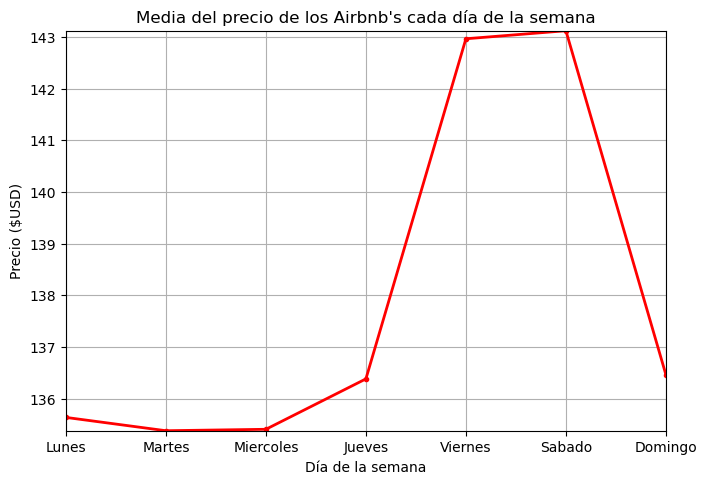

In [66]:
fig = plt.figure(dpi=100)
axes = fig.add_axes([0,0,1,1])
axes.plot( precios_dia_semana["day_week"], precios_dia_semana["price"], 'r.-',linewidth=2)
axes.grid()
axes.autoscale(axis='both', tight=True)
axes.set_title("Media del precio de los Airbnb's cada día de la semana")
axes.set_ylabel("Precio ($USD)")
axes.set_xlabel("Día de la semana")

In [67]:
#Por ultimo miramos cuales fueron los Airbnb's más ocupados a lo largo del año
ocupacion = calendario[["available", "listing_id"]].groupby("listing_id").sum()
day = np.arange(0, 365)
ocupacion.reset_index(inplace=True)
ocupacion.rename(columns={"listing_id": "id"}, inplace = True)
ocupacion

,id,available
0,3335,309
1,4291,365
2,5682,309
3,6606,365
4,7369,53
...,...,...
3813,10332096,365
3814,10334184,361
3815,10339144,0
3816,10339145,365


Text(0.5, 0, 'Días disponibles')

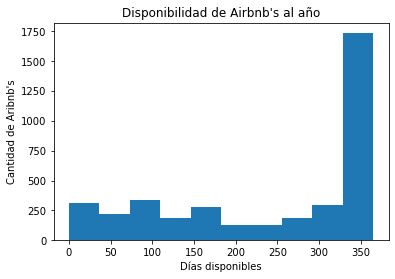

In [68]:
plt.hist(ocupacion["available"]);
plt.title("Disponibilidad de Airbnb's al año")
plt.ylabel("Cantidad de Aribnb's")
plt.xlabel("Días disponibles")

### Concluciones del calendario

1. Se observa que durante los meses de verano la demanda de airbnb's es mucho más alta, algo que es evidente. Sin embargo, se observa que durante la festividades de fin de año del 2016 la demanda minima, algo que no se esperaba pues los viajes son frecuentes en esta epoca.
2. De manera similar, el precio aumenta junto con la demanda, algo que es evidente. Pero tambien se observa que los días Viernes y Sabado se eleva el precio en aproximadamente 8 usd.
3. En el histograma de ocupación se observa que la mayoria de los airbnb's estan disponibles casi todo el año. Con el siguiente dataset se buscará la correlación entre las distintas variables con la disponibilidad del airbnb al año.

In [69]:
listado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [816]:
# Creamos copia del dataset
listado_copia = listado.copy()
# Eliminamos variables redundantes o inecesarias del dataset
innecesario = ["country","country_code","thumbnail_url","medium_url","picture_url","xl_picture_url","host_url","listing_url",
               "license", "jurisdiction_names", "last_review","first_review","has_availability","description","last_scraped",
               "city","state","market","calendar_last_scraped","neighbourhood_cleansed","calendar_updated","space","summary",
               "name","neighborhood_overview","host_id","host_name","host_location","host_about","host_response_time","zipcode",
               "host_response_rate","host_acceptance_rate","host_thumbnail_url","host_picture_url","host_neighbourhood",
               "host_listings_count","host_total_listings_count","host_verifications","host_has_profile_pic","host_identity_verified",
               "street", "host_since", "host_is_superhost", "neighbourhood_group_cleansed", "smart_location","amenities",
               "calculated_host_listings_count","require_guest_phone_verification","require_guest_profile_picture","review_scores_communication",
               "review_scores_checkin","review_scores_cleanliness","review_scores_accuracy","number_of_reviews","availability_30",
               "availability_60","availability_90","availability_365", "requires_license", "reviews_per_month","instant_bookable",
               "review_scores_value","weekly_price","monthly_price","transit","notes","square_feet","cleaning_fee",
               "security_deposit","experiences_offered","scrape_id","maximum_nights","review_scores_rating"]
for i in range(len(innecesario)):
    listado_copia.pop(innecesario[i])

listado_copia = pd.merge(listado_copia,ocupacion,on='id')
listado_copia["price"] = listado_copia["price"].str.replace("$","")
listado_copia["price"] = listado_copia["price"].str.replace(",","")
listado_copia["price"] = pd.to_numeric(listado_copia["price"])
listado_copia.head()

,id,neighbourhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,review_scores_location,cancellation_policy,available
0,241032,Queen Anne,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,2,$5.00,1,9.0,moderate,346
1,953595,Queen Anne,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,150.0,1,$0.00,2,10.0,strict,291
2,3308979,Queen Anne,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,975.0,10,$25.00,4,10.0,strict,220
3,7421966,Queen Anne,47.638473,-122.369279,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,100.0,1,$0.00,1,NaN,flexible,143
4,278830,Queen Anne,47.632918,-122.372471,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,450.0,6,$15.00,1,9.0,strict,365


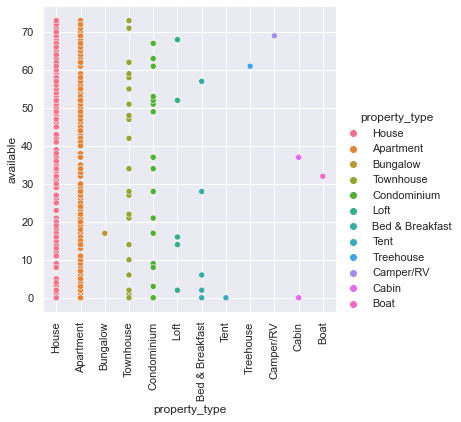

In [817]:
min_dias = 365*0.2
min_dias

sns.relplot(data=listado_copia[listado_copia["available"] <= min_dias], x="property_type", y="available", hue="property_type", 
            kind = 'scatter').set_xticklabels(rotation=90) # Gráfica relacional de dispersión.

In [818]:
listado_copia["property_type"].value_counts() - listado_copia[listado_copia["available"] > min_dias]["property_type"].value_counts()
listado_copia = listado_copia[(listado_copia["property_type"]!="Chalet")&(listado_copia["property_type"]!="Other")&(listado_copia["property_type"]!="Dorm")&(listado_copia["property_type"]!="Yurt")&(listado_copia["property_type"]!="Cabin")&(listado_copia["property_type"]!="Camper/RV")&(listado_copia["property_type"]!="Treehouse")&(listado_copia["property_type"]!="Bed & Breakfast")&(listado_copia["property_type"]!="Loft")]

In [819]:
pd.options.plotting.backend = "plotly"
fig = px.box(listado_copia, y="price", x="property_type")
fig.show()

In [820]:
listado_copia = listado_copia[listado_copia["price"]!=1000]
listado_copia = listado_copia[listado_copia["price"]<400]
listado_copia[listado_copia["property_type"]=="Apartment"] = listado_copia[listado_copia["price"]<=245]
listado_copia[listado_copia["property_type"]=="House"] = listado_copia[listado_copia["price"]<=310]
listado_copia[listado_copia["property_type"]=="Condominium"] = listado_copia[listado_copia["price"]<=215]
listado_copia[listado_copia["property_type"]=="Bungalow"] = listado_copia[listado_copia["price"]<=156]
listado_copia[listado_copia["property_type"]=="Townhouse"] = listado_copia[listado_copia["price"]<=275]

listado_copia = listado_copia.dropna()

In [821]:
fig = px.box(listado_copia, y="price", x="property_type")
fig.show()

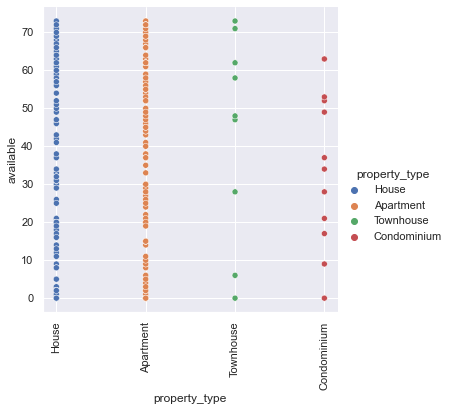

In [822]:
sns.relplot(data=listado_copia[listado_copia["available"] <= min_dias], x="property_type", y="available", hue="property_type", 
            kind = 'scatter').set_xticklabels(rotation=90)

In [823]:
listado_copia.corr()

,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,review_scores_location,available
id,1.000000,-0.013875,0.009917,-0.075381,-0.056886,-0.084026,-0.065199,-0.079347,-0.080068,-0.020984,0.106002,-0.164165
latitude,-0.013875,1.000000,-0.164922,-0.006563,-0.030509,0.030131,0.017089,-0.017540,0.033291,-0.002569,0.109086,0.014238
longitude,0.009917,-0.164922,1.000000,-0.038947,0.038266,-0.007828,-0.047574,-0.086534,-0.018453,0.004510,-0.194701,-0.013536
accommodates,-0.075381,-0.006563,-0.038947,1.000000,0.442477,0.714704,0.835419,0.639607,0.514320,0.014426,-0.078605,-0.034995
bathrooms,-0.056886,-0.030509,0.038266,0.442477,1.000000,0.541043,0.427347,0.399507,0.224489,-0.001509,-0.027263,0.001747
bedrooms,-0.084026,0.030131,-0.007828,0.714704,0.541043,1.000000,0.712357,0.583291,0.411289,0.006465,-0.052356,-0.054331
beds,-0.065199,0.017089,-0.047574,0.835419,0.427347,0.712357,1.000000,0.575115,0.431660,-0.004911,-0.049288,-0.008480
price,-0.079347,-0.017540,-0.086534,0.639607,0.399507,0.583291,0.575115,1.000000,0.381161,0.024633,0.067529,-0.043825
guests_included,-0.080068,0.033291,-0.018453,0.514320,0.224489,0.411289,0.431660,0.381161,1.000000,-0.007902,-0.054039,-0.075571
minimum_nights,-0.020984,-0.002569,0.004510,0.014426,-0.001509,0.006465,-0.004911,0.024633,-0.007902,1.000000,0.013140,0.017618


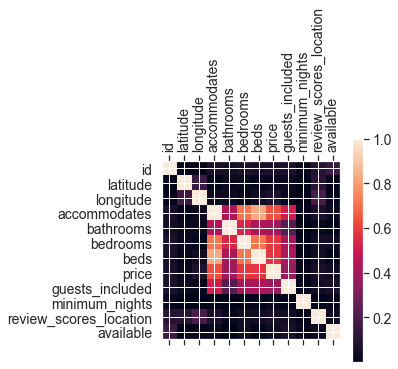

In [824]:
plt.matshow(abs(listado_copia.corr()))
plt.xticks(range(listado_copia.select_dtypes(['number']).shape[1]), listado_copia.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(listado_copia.select_dtypes(['number']).shape[1]), listado_copia.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [840]:
true_location.plot.scatter("longitude", "latitude", s=1, c="available")

In [842]:
cluster_destino = folium.Map(location = seattle_coords,
                            zoom_start = 11,
                            control_scale = True
                            )

# Creamos tuplas con los valores de coordenadas.
destino_coords = true_location[['latitude', 'longitude']].values

# Utilizamos los datos de origen para generar clusters dispuestos por la ciudad
FastMarkerCluster(name ="available" ,
                  data= destino_coords).add_to(cluster_destino)

cluster_destino

In [ ]:
norte = true_location[(true_location["latitude"]>47.65)]
norte.plot.scatter("longitude", "latitude", s=1, c="available", cmap='copper')

In [ ]:
norte = norte[norte["available"]<=min_dias]
plt.matshow(abs(norte.corr()))
plt.xticks(range(norte.select_dtypes(['number']).shape[1]), norte.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(norte.select_dtypes(['number']).shape[1]), norte.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [ ]:
sur = true_location[((true_location["latitude"]<47.60)&(true_location["longitude"]<-122.34))]
sur.plot.scatter("longitude", "latitude", s=1, c="available", cmap='copper')

In [ ]:
sur = sur[sur["available"]<=min_dias]
abs(sur.corr())

In [ ]:
plt.matshow(abs(sur.corr()))
plt.xticks(range(sur.select_dtypes(['number']).shape[1]), sur.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(sur.select_dtypes(['number']).shape[1]), sur.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [ ]:
centro = true_location[(true_location["latitude"]>47.61)|(true_location["longitude"]>-122.34)]
centro = centro[(centro["latitude"]<47.65)]
centro.plot.scatter("longitude", "latitude", s=1, c="available", cmap='copper')

In [ ]:
abs(centro.corr())

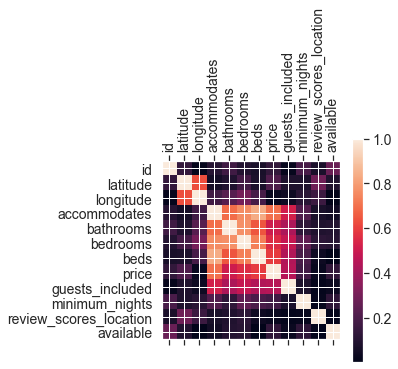

In [826]:
plt.matshow(abs(centro.corr()))
plt.xticks(range(centro.select_dtypes(['number']).shape[1]), centro.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(centro.select_dtypes(['number']).shape[1]), centro.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [827]:
def relación_alta_significativa(var_a, var_b, df, min_mag = 0.5, confianza = 0.95):
    corr, pvalor = stats.pearsonr(df[var_a], df[var_b])
    es_alta_significativa = abs(corr)>=min_mag and pvalor<=1-confianza
    return es_alta_significativa, abs(corr), pvalor

In [828]:
columnas  = centro.corr().columns

print("Norte")
for i in columnas:
    if relación_alta_significativa(i, 'available', df=norte)[0] == True:
        print(i)

print("Centro")
for i in columnas:
    if relación_alta_significativa(i, 'available', df=centro)[0] == True:
        print(i)

print("Sur")
for i in columnas:
    if relación_alta_significativa(i, 'available', df=sur)[0] == True:
        print(i)

Norte
available
Centro
available
Sur
available


Dado que se busca una locación que cumpla con que la mayoría del año este ocupado, se filtran las posiciones de acuerdo a que la disponibilidad sea menor al 20%, es decir, que este ocupado el 80% del año.

In [829]:
print("Norte")
for i in columnas:
    if relación_alta_significativa(i, 'available', df=norte[norte["available"]<=min_dias])[0] == True:
        print(i)

print("Centro")
for i in columnas:
    if relación_alta_significativa(i, 'available', df=centro[centro["available"]<=min_dias])[0] == True:
        print(i)

print("Sur")
for i in columnas:
    if relación_alta_significativa(i, 'available', df=sur[sur["available"]<=min_dias])[0] == True:
        print(i)

Norte
available
Centro
available
Sur
available


In [830]:
seattle_coords = (47.608013, -122.335167)
cluster_destino = folium.Map(location = seattle_coords,
                            zoom_start = 11,
                            control_scale = True
                            )

# Creamos tuplas con los valores de coordenadas.
destino_coords = ocupacion_minima[['latitude', 'longitude']].values

# Utilizamos los datos de origen para generar clusters dispuestos por la ciudad
FastMarkerCluster(name ="available" ,
                  data= destino_coords).add_to(cluster_destino)

cluster_destino

In [841]:
ocupacion_minima = true_location[true_location["available"]<=min_dias]
ocupacion_minima.head()

,id,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,review_scores_location,cancellation_policy,available
33,5021081,47.638121,-122.375790,t,House,Entire home/apt,7,3.5,4.0,3.0,Real Bed,222.0,7,$75.00,2,9.0,strict,2
94,6590264,47.669874,-122.387717,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,115.0,2,$50.00,1,9.0,strict,56
113,7134759,47.668961,-122.393877,t,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,60.0,1,$0.00,1,10.0,moderate,47
119,1609922,47.671666,-122.377912,t,House,Entire home/apt,5,1.5,2.0,2.0,Real Bed,150.0,2,$10.00,4,10.0,moderate,16
123,6423204,47.671560,-122.382704,t,House,Entire home/apt,3,1.0,2.0,2.0,Real Bed,115.0,2,$10.00,3,9.0,strict,54


In [833]:
ocupacion_minima["property_type"].value_counts()

Apartment      156
House          151
Condominium     12
Townhouse       10
Name: property_type, dtype: int64

In [834]:
ocupacion_minima = ocupacion_minima[(ocupacion_minima["property_type"]!="Condominium")&(ocupacion_minima["property_type"]!="Townhouse")]

In [835]:
ocupacion_minima["bathrooms"].value_counts()

1.0    231
2.0     43
1.5     12
2.5      9
3.0      7
3.5      5
Name: bathrooms, dtype: int64

In [836]:
ocupacion_minima["bedrooms"].value_counts()

1.0    175
2.0     50
0.0     38
3.0     32
4.0     12
Name: bedrooms, dtype: int64

In [837]:
ocupacion_minima["beds"].value_counts()

1.0    174
2.0     75
3.0     41
4.0      9
5.0      6
6.0      2
Name: beds, dtype: int64

In [838]:
ocupacion_minima["room_type"].value_counts()

Entire home/apt    220
Private room        81
Shared room          6
Name: room_type, dtype: int64

In [839]:
ocupacion_minima["bed_type"].value_counts()

Real Bed         295
Futon              6
Pull-out Sofa      4
Couch              2
Name: bed_type, dtype: int64